# PJ3

In [429]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.patches as patches
import matplotlib.colors as mplcolors
import matplotlib.ticker as ptick
import matplotlib.colorbar as mplcolorbar
import matplotlib.cm as mplcm
from matplotlib.ticker import AutoMinorLocator
import math
import Leadangle_wave as Wave
from Leadangle_fit_JunoUVS import eqwlong_err
from Leadangle_fit_JunoUVS import TEB_transit
from Leadangle_fit_JunoUVS import create_argmesh
from column_mass import calc as column_calc
from UniversalColor import UniversalColor
from SharedX import ShareXaxis
from legend_shadow import legend_shadow

UC = UniversalColor()
UC.set_palette()

F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'
F.set_default()

# F.set_figparams()
# F.initialize()

In [430]:
exname = '003/20250516_078'
TARGET_MOON = 'Io'
target_fp = ['MAW', 'TEB']
PJ_num = ['28S']
Ai_num = 3
ni_num = 50
Ti_num = 60
Zi = 1.4
Te = 6.0  # [eV]


chi2_1d = np.loadtxt('results/fit/'+exname+'/params_chi2.txt')
Ai_1d = np.loadtxt('results/fit/'+exname+'/params_Ai.txt')
ni_1d = np.loadtxt('results/fit/'+exname+'/params_ni.txt')
Ti_1d = np.loadtxt('results/fit/'+exname+'/params_Ti.txt')
H_1d = np.loadtxt('results/fit/'+exname+'/params_H.txt')
eqlead_est = np.loadtxt('results/fit/'+exname+'/eqlead_est.txt')
eqlead_obs = np.loadtxt('results/fit/'+exname+'/eqlead_obs.txt')
sigma_total = np.loadtxt('results/fit/'+exname+'/sigma_y.txt')
hem_obs = np.loadtxt('results/fit/'+exname+'/hems_obs.txt')
moon_S3wlon_obs = np.loadtxt('results/fit/'+exname+'/moon_S3wlon_obs.txt')
print(chi2_1d.shape)
print(eqlead_est.shape)

chi2_3d_a = chi2_1d.reshape(ni_num, Ai_num, Ti_num)
H_3d_a = H_1d.reshape(ni_num, Ai_num, Ti_num)
Ai_3d_a = Ai_1d.reshape(ni_num, Ai_num, Ti_num)
ni_3d_a = ni_1d.reshape(ni_num, Ai_num, Ti_num)
Ti_3d_a = Ti_1d.reshape(ni_num, Ai_num, Ti_num)
eqlead_est_3d_a = eqlead_est[1].reshape(ni_num, Ai_num, Ti_num)

# 保存されているカイ2乗値は自由度で割ってしまっているので
# ここで元に戻す
chi2_3d_a = chi2_3d_a*(eqlead_est.shape[0]-3)

sigma_obs = sigma_total

print('Parameter ranges:')
print('Ai:', np.min(Ai_3d_a), np.max(Ai_3d_a))
print('ni:', np.min(ni_3d_a), np.max(ni_3d_a))
print('Ti:', np.min(Ti_3d_a), np.max(Ti_3d_a))
print('Hi:', np.min(H_3d_a)/71492E+3, np.max(H_3d_a)/71492E+3)
print('Degree of freedom:', (eqlead_est.shape[0]-3))

(9000,)
(40, 9000)
Parameter ranges:
Ai: 20.0 24.0
ni: 499.9999999999999 4999.9999999999945
Ti: 9.999999999999998 999.9999999999999
Hi: 0.5511684557979226 4.543098502123853
Degree of freedom: 37


In [431]:
column_mass_1dN = np.loadtxt(
    'results/column_mass/003/20250516_'+TARGET_MOON+'/col_massdens_1dN.txt')
column_mass_1dS = np.loadtxt(
    'results/column_mass/003/20250516_'+TARGET_MOON+'/col_massdens_1dS.txt')
column_mass_3dN = column_mass_1dN.reshape(ni_num, Ai_num, Ti_num)
column_mass_3dS = column_mass_1dS.reshape(ni_num, Ai_num, Ti_num)
column_mass_3d_a = column_mass_3dN+column_mass_3dS

In [432]:
# %% Constants
dchi_1s = 2.30     # デルタchi2の1シグマ区間
dchi_2s = 6.17     # デルタchi2の2シグマ区間
dchi_3s = 11.8     # デルタchi2の3シグマ区間

MU0 = 1.26E-6            # 真空中の透磁率
AMU2KG = 1.66E-27        # 原子質量をkgに変換するファクタ [kg]
RJ = 71492E+3            # JUPITER RADIUS [m]
MJ = 1.90E+27            # JUPITER MASS [kg]
C = 2.99792E+8           # LIGHT SPEED [m/s]
G = 6.67E-11             # 万有引力定数  [m^3 kg^-1 s^-2]

Psyn_io = (12.89)*3600      # Moon's synodic period [sec]
Psyn_eu = (11.22)*3600      # Moon's synodic period [sec]
Psyn_ga = (10.53)*3600      # Moon's synodic period [sec]

if TARGET_MOON == 'Io':
    Psyn = Psyn_io
    r_moon = 5.9*RJ
    xticks = np.array([1, 10, 100, 500, 1000, 5000])
elif TARGET_MOON == 'Europa':
    Psyn = Psyn_eu
    r_moon = 9.4*RJ
    xticks = np.array([1, 10, 100, 500, 1000, 5000])
elif TARGET_MOON == 'Ganymede':
    Psyn = Psyn_ga
    r_moon = 15.0*RJ
    xticks = np.array([1, 10, 100, 1000])

sigma_x = eqwlong_err(Psyn, dt=22.5)*np.ones(sigma_obs.shape)
print('sigma_x [deg]:', sigma_x)

sigma_x [deg]: [0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392 0.17455392
 0.17455392 0.17455392 0.17455392 0.17455392]


(60, 50)
Best fit for A_i = 20.0 amu
             n_i = 1279.7739613497674 cm-3
             T_i = 153.6174946671829 eV
(60, 50)
Best fit for A_i = 22.0 amu
             n_i = 1164.9759052576849 cm-3
             T_i = 166.08827826277152 eV
(60, 50)
Best fit for A_i = 24.0 amu
             n_i = 1011.7948238625778 cm-3
             T_i = 209.91037201085535 eV


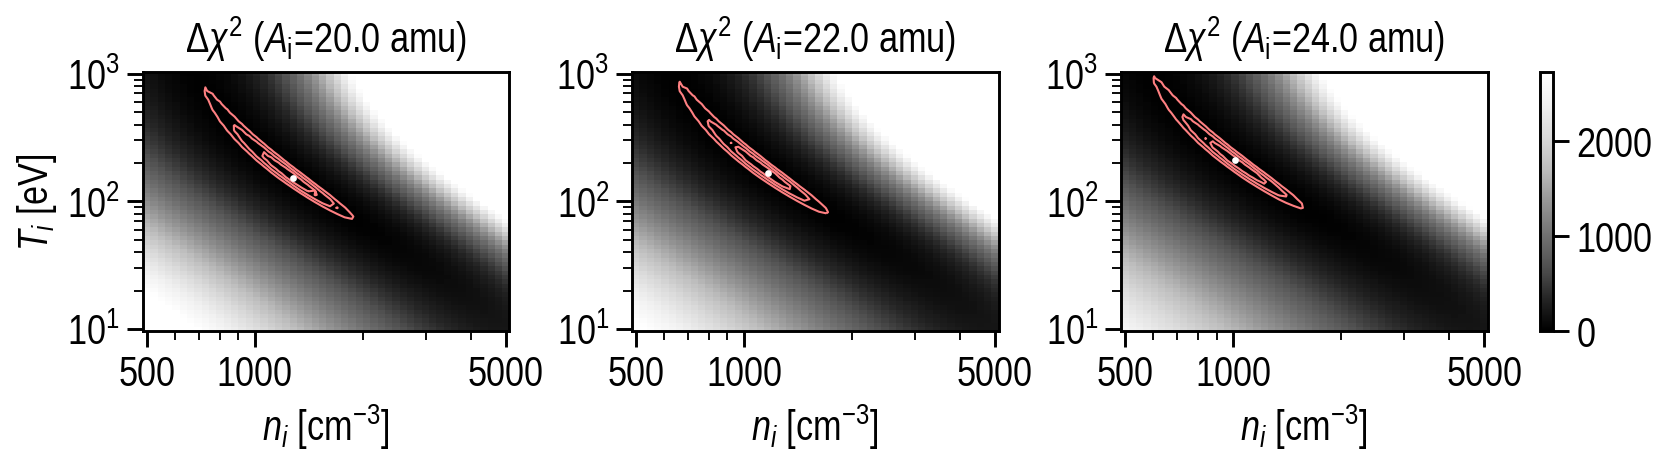

In [433]:
# 横軸 ni
fig, ax = plt.subplots(1, 3, figsize=(11, 3), dpi=150, layout='constrained')
for i in range(3):
    z_new = chi2_3d_a[:, i, :].T
    x_new = ni_3d_a[:, i, :].T
    y_new = Ti_3d_a[:, i, :].T

    z_value = z_new-np.min(z_new)
    print(z_value.shape)

    x_value = x_new
    y_value = y_new

    ax[i].set_title(
        r'$\Delta \chi^2$ ($A_{\rm i}$='+str(Ai_3d_a[0, i, 0])+' amu)')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[0].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
    cn = ax[i].contour(x_value, y_value, z_value,
                       levels=[2.30, 6.17, 11.8],
                       # levels=[21.36, 30.48, 40.29],
                       colors=UC.pink,
                       linewidths=1.0,
                       zorder=2)
    p = ax[i].pcolormesh(x_value,
                         y_value,
                         z_value,
                         cmap='Greys_r',
                         vmin=0, vmax=np.std(z_value), zorder=0.5)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value == np.min(z_value))]
    y_best = y_value[np.where(z_value == np.min(z_value))]
    ax[i].scatter(x_best, y_best,
                  s=5, color='w', zorder=2.5)

    # Best fit parameter
    print('Best fit for A_i = '+str(Ai_3d_a[0, i, 0])+' amu')
    print('             n_i = '+str(x_best[0])+' cm-3')
    print('             T_i = '+str(y_best[0])+' eV')

fig.colorbar(p)
plt.show()

(60, 50)
Best fit for A_i = 20.0 amu
             n_i = 1279.7739613497674 cm-3
             T_i = 153.6174946671829 eV
             (1) Highest n_i = 1863.7968601574682 cm-3
             (1) Lowest T_i = 76.09496685459875 eV
             (2) Lowest n_i = 728.1742387506218 cm-3
             (2) Hightest T_i = 731.8242219076182 eV
(60, 50)
Best fit for A_i = 22.0 amu
             n_i = 1164.9759052576849 cm-3
             T_i = 166.08827826277152 eV
             (1) Highest n_i = 1696.6108859476628 cm-3
             (1) Lowest T_i = 82.27241341700469 eV
             (2) Lowest n_i = 662.855682795054 cm-3
             (2) Hightest T_i = 855.4672535565676 eV
(60, 50)
Best fit for A_i = 24.0 amu
             n_i = 1011.7948238625778 cm-3
             T_i = 209.91037201085535 eV
             (1) Highest n_i = 1544.4217982387397 cm-3
             (1) Lowest T_i = 88.95134973108235 eV
             (2) Lowest n_i = 603.3963203196639 cm-3
             (2) Hightest T_i = 924.9147277217329 eV


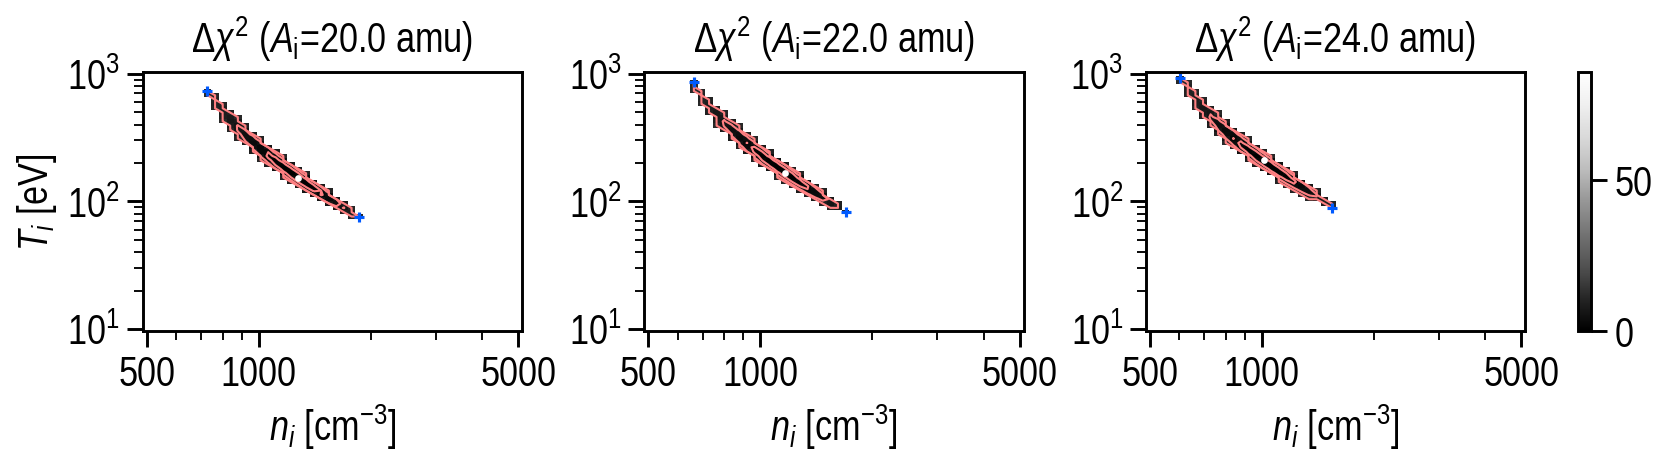

In [434]:
# 横軸 ni
fig, ax = plt.subplots(1, 3, figsize=(11, 3), dpi=150, layout='constrained')
for i in range(3):
    z_new = chi2_3d_a[:, i, :].T
    x_new = ni_3d_a[:, i, :].T
    y_new = Ti_3d_a[:, i, :].T

    z_value = z_new-np.min(z_new)
    print(z_value.shape)

    z_value = np.where(z_value < 11.8, z_value, 500)

    ax[i].set_title(
        r'$\Delta \chi^2$ ($A_{\rm i}$='+str(Ai_3d_a[0, i, 0])+' amu)')
    ax[i].set_xlabel(r'$n_i$ [cm$^{-3}$]')
    ax[0].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
    cn = ax[i].contour(x_value, y_value, z_value,
                       levels=[2.30, 6.17, 11.8],
                       # levels=[21.36, 30.48, 40.29],
                       colors=UC.pink,
                       linewidths=1.0,
                       zorder=2)
    p = ax[i].pcolormesh(x_value,
                         y_value,
                         z_value,
                         cmap='Greys_r',
                         vmin=0, vmax=np.std(z_value), zorder=0.5)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value == np.min(z_value))]
    y_best = y_value[np.where(z_value == np.min(z_value))]
    ax[i].scatter(x_best, y_best,
                  s=5, color='w', zorder=2.5)

    # Best fit parameter
    print('Best fit for A_i = '+str(Ai_3d_a[0, i, 0])+' amu')
    print('             n_i = '+str(x_best[0])+' cm-3')
    print('             T_i = '+str(y_best[0])+' eV')

    # Lowest temperature
    x_value_mask = x_value[np.where(z_value < 11.8)]
    y_value_mask = y_value[np.where(z_value < 11.8)]
    print('             (1) Highest n_i = '+str(x_value_mask.max())+' cm-3')
    print('             (1) Lowest T_i = '+str(y_value_mask.min())+' eV')
    ax[i].scatter(x_value_mask.max(),
                  y_value_mask.min(),
                  marker='+',
                  s=20, color=UC.blue, zorder=2.5)

    # Lowest temperature
    print('             (2) Lowest n_i = '+str(x_value_mask.min())+' cm-3')
    print('             (2) Hightest T_i = '+str(y_value_mask.max())+' eV')
    ax[i].scatter(x_value_mask.min(),
                  y_value_mask.max(),
                  marker='+',
                  s=20, color=UC.blue, zorder=2.5)

fig.colorbar(p)
plt.show()

Median:  1.0063193960288486e-08
5 percentile & delta:  9.127114113565892e-09 9.360798467225937e-10
95 percentile & delta:  1.1298132327937058e-08 1.2349383676485719e-09
Median:  1.0071003262245016e-08
5 percentile & delta:  9.132416749616842e-09 9.385865126281742e-10
95 percentile & delta:  1.1284241942529863e-08 1.2132386802848472e-09
Median:  1.0097334134378503e-08
5 percentile & delta:  9.111817056739677e-09 9.855170776388261e-10
95 percentile & delta:  1.1430557767959473e-08 1.3332236335809698e-09


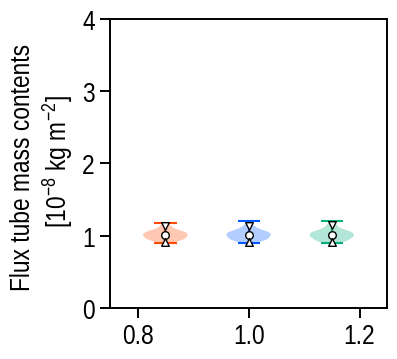

In [435]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(4, 4), dpi='S')
F.initialize()
F.ax.set_xlim(0.75, 1.25)
F.ax.set_ylim(0.0, 4.0)
F.ax.set_ylabel('Flux tube mass contents \n [10$^{-8}$ kg m$^{-2}$]')

x_pos = [0.85, 1.0, 1.15]

for i in range(3):
    column_mass_2d = column_mass_3d_a[:, i, :].T
    chi2_2d = chi2_3d_a[:, i, :].T
    chi2_2d = chi2_2d - np.min(chi2_2d)

    # 3-sigma area
    column_mass_2d = column_mass_2d[np.where(chi2_2d < dchi_3s)]
    chi2_2d = chi2_2d[np.where(chi2_2d < dchi_3s)]   # 一番最後に

    quartile1, medians, quartile3 = np.percentile(
        column_mass_2d, [5, 50, 95], axis=0)

    parts = F.ax.violinplot(column_mass_2d*1E+8,
                            positions=[x_pos[i]],
                            widths=0.08)
    F.ax.scatter(x_pos[i], medians*1E+8, s=30, marker='o',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile1*1E+8, s=30, marker='^',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile3*1E+8, s=30, marker='v',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)

    print('Median: ', medians)
    print('5 percentile & delta: ', quartile1, medians-quartile1)
    print('95 percentile & delta: ', quartile3, quartile3-medians)

Median:  1.0063193960288486e-08
5 percentile & delta:  9.127114113565892e-09 9.360798467225937e-10
95 percentile & delta:  1.1298132327937058e-08 1.2349383676485719e-09
Median:  1.0071003262245016e-08
5 percentile & delta:  9.132416749616842e-09 9.385865126281742e-10
95 percentile & delta:  1.1284241942529863e-08 1.2132386802848472e-09
Median:  1.0097334134378503e-08
5 percentile & delta:  9.111817056739677e-09 9.855170776388261e-10
95 percentile & delta:  1.1430557767959473e-08 1.3332236335809698e-09


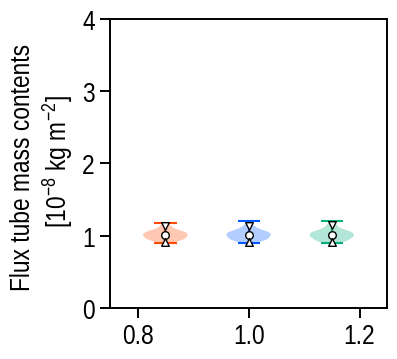

In [436]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(4, 4), dpi='S')
F.initialize()
F.ax.set_xlim(0.75, 1.25)
F.ax.set_ylim(0.0, 4.0)
F.ax.set_ylabel('Flux tube mass contents \n [10$^{-8}$ kg m$^{-2}$]')

x_pos = [0.85, 1.0, 1.15]

for i in range(3):
    column_mass_2d = column_mass_3d_a[:, i, :].T
    chi2_2d = chi2_3d_a[:, i, :].T
    chi2_2d = chi2_2d - np.min(chi2_2d)

    # 3-sigma area
    column_mass_2d = column_mass_2d[np.where(chi2_2d < dchi_3s)]
    chi2_2d = chi2_2d[np.where(chi2_2d < dchi_3s)]   # 一番最後に

    quartile1, medians, quartile3 = np.percentile(
        column_mass_2d, [5, 50, 95], axis=0)

    parts = F.ax.violinplot(column_mass_2d*1E+8,
                            positions=[x_pos[i]],
                            widths=0.08)
    F.ax.scatter(x_pos[i], medians*1E+8, s=30, marker='o',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile1*1E+8, s=30, marker='^',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile3*1E+8, s=30, marker='v',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)

    print('Median: ', medians)
    print('5 percentile & delta: ', quartile1, medians-quartile1)
    print('95 percentile & delta: ', quartile3, quartile3-medians)

(array([14., 15., 18., 19., 15.,  5.,  5.,  3.]),
 array([8.96341328e-09, 9.34154977e-09, 9.71968626e-09, 1.00978228e-08,
        1.04759592e-08, 1.08540957e-08, 1.12322322e-08, 1.16103687e-08,
        1.19885052e-08]),
 <BarContainer object of 8 artists>)

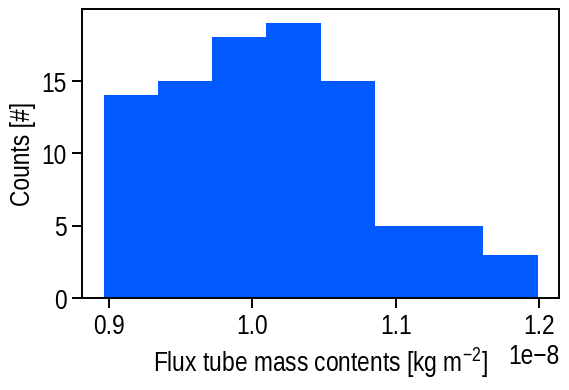

In [437]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(6, 4), dpi='S')
F.initialize()

F.ax.set_xlabel(r'Flux tube mass contents [kg m$^{-2}$]')
F.ax.set_ylabel(r'Counts [#]')
F.ax.hist(column_mass_2d, color=UC.blue, bins='auto')

In [438]:
# グリッドの面積比を計算する
x_grid = ni_3d_a[:, 1, :].T    # shape -> (Ti.size, ni.size)
y_grid = Ti_3d_a[:, 1, :].T
column_mass_2d = column_mass_3d_a[:, 1, :].T
chi2_2d = chi2_3d_a[:, 1, :].T

dx_arr = x_grid[:-1, 1:]-x_grid[:-1, :-1]
dy_arr = y_grid[1:, :-1]-y_grid[:-1, :-1]
print(dx_arr.shape)
print(dy_arr.shape)
print(np.min(dx_arr))
print(np.min(dy_arr))

area = dx_arr * dy_arr
weight = area/np.max(area)

# 面積arrayに形状を揃える
column_mass_2d = column_mass_2d[:-1, :-1]
chi2_2d = chi2_2d[:-1, :-1]

# 5000 /ccで切るかどうか
x_max_idx = np.size(x_grid[0, :])
x_max_idx = np.argmin(np.abs(x_grid[0, :]-5000.0))
print(x_max_idx)
column_mass_2d = column_mass_2d[:, :x_max_idx-1]
area = area[:, :x_max_idx-1]
weight = weight[:, :x_max_idx-1]
chi2_2d = chi2_2d[:, :x_max_idx-1]

# 3-sigma area
column_mass_2d = column_mass_2d[np.where(chi2_2d-np.min(chi2_2d) < dchi_3s)]
column_mass_2d_h = column_mass_2d.copy()
weight = weight[np.where(chi2_2d-np.min(chi2_2d) < dchi_3s)]
chi2_2d = chi2_2d[np.where(chi2_2d-np.min(chi2_2d) < dchi_3s)]   # 一番最後に

(59, 49)
(59, 49)
24.056567077342834
0.8118075107660818
49


In [439]:
print(column_mass_2d.shape)

(91,)


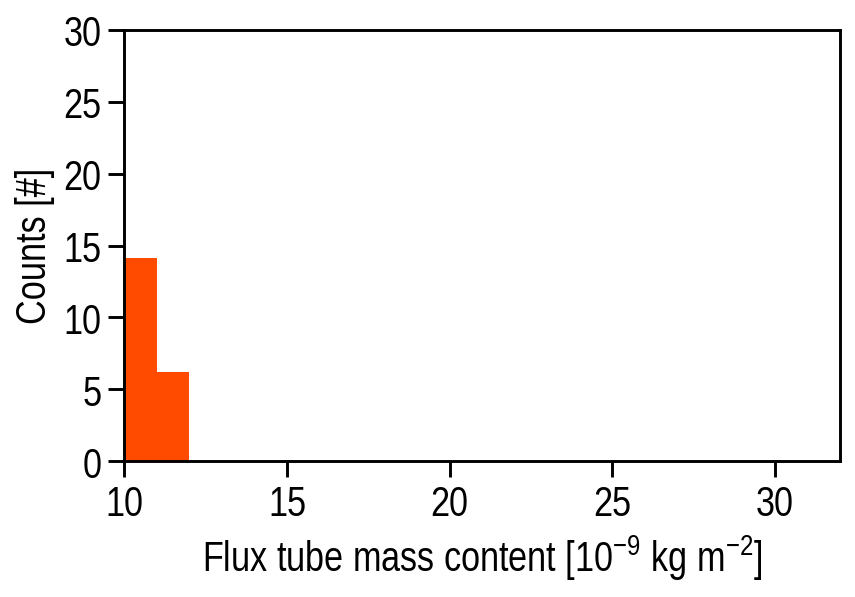

In [440]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(6, 4), dpi='M')
F.initialize()

F.ax.set_xlabel(r'Flux tube mass content [$10^{-9}$ kg m$^{-2}$]')
F.ax.set_ylabel(r'Counts [#]')
F.ax.set_xlim(10, 32)
F.ax.set_ylim(0, 5)
F.ax.set_yticks(np.linspace(0, 5, 7))
F.ax.set_yticklabels(np.linspace(0, 30, 7, dtype=int))
_, bins, hpatches = F.ax.hist(column_mass_2d*1E+9,
                              bins=np.arange(10.0, 32.0, 1), weights=weight)
# patches[9].set_facecolor('red')

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32.]


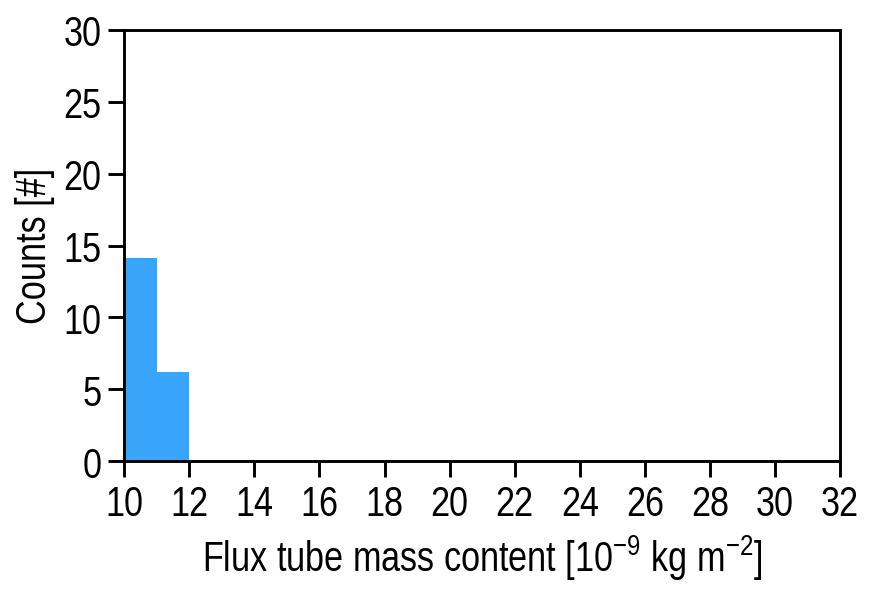

In [441]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(6, 4), dpi='M')
F.initialize()

F.ax.set_xlabel(r'Flux tube mass content [$10^{-9}$ kg m$^{-2}$]')
F.ax.set_ylabel(r'Counts [#]')
F.ax.set_xlim(10, 32)
F.ax.set_ylim(0, 5)
F.ax.set_xticks(np.arange(10, 32+1, 2))
F.ax.set_xticklabels(np.arange(10, 32+1, 2))
F.ax.set_yticks(np.linspace(0, 5, 7))
F.ax.set_yticklabels(np.linspace(0, 30, 7, dtype=int))
_, bins, hpatches = F.ax.hist(column_mass_2d*1E+9,
                              bins=np.arange(10.0, 32.0+1.0, 1.0), weights=weight)
print(bins)

cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=40)

for i in range(int(len(hpatches)/2)):
    hpatches[2*i].set_facecolor(color_list[i+5])
    hpatches[2*i+1].set_facecolor(color_list[i+5])

In [442]:
hist, binedge = np.histogram(column_mass_2d*1E+9,
                             bins=10,
                             weights=weight)
print(hist, binedge)

[0.33427564 0.53286935 0.63195796 0.69171978 0.79965873 0.90290267
 0.49556229 0.47702458 0.22218621 0.24374777] [ 8.91944977  9.2240648   9.52867983  9.83329486 10.13790989 10.44252492
 10.74713995 11.05175498 11.35637001 11.66098504 11.96560007]


In [443]:
def weighted_percentile(data, weights, perc):
    """
    perc : percentile in [0-1]!
    """
    ix = np.argsort(data)
    data = data[ix]  # sort data
    weights = weights[ix]  # sort weights
    cdf = (np.cumsum(weights) - 0.5 * weights) / \
        np.sum(weights)  # 'like' a CDF function
    return np.interp(perc, cdf, data)

In [444]:
weighted_percentile(data=column_mass_2d,
                    perc=[0.05, 0.5, 0.95],
                    weights=weight)

array([9.16677186e-09, 1.02806379e-08, 1.16114559e-08])

Median:  1.0272473233562378e-08
5 percentile & delta:  9.761436748427258e-09 5.110364851351198e-10
95 percentile & delta:  1.0741870964066137e-08 4.693977305037593e-10
Median:  1.0280637887656128e-08
5 percentile & delta:  9.749220168842342e-09 5.314177188137854e-10
95 percentile & delta:  1.0844184465841079e-08 5.635465781849513e-10
Median:  1.0322565342191568e-08
5 percentile & delta:  9.76205316509709e-09 5.60512177094478e-10
95 percentile & delta:  1.0826180524982057e-08 5.036151827904897e-10


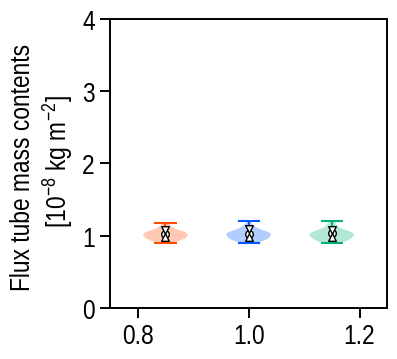

In [445]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(4, 4), dpi='S')
F.initialize()
F.ax.set_xlim(0.75, 1.25)
F.ax.set_ylim(0.0, 4.0)
F.ax.set_ylabel('Flux tube mass contents \n [10$^{-8}$ kg m$^{-2}$]')

x_pos = [0.85, 1.0, 1.15]

for i in range(3):
    column_mass_2d = column_mass_3d_a[:, i, :].T
    chi2_2d = chi2_3d_a[:, i, :].T
    chi2_2d = chi2_2d - np.min(chi2_2d)

    # グリッドの面積比を計算する
    x_grid = ni_3d_a[:, 1, :].T    # shape -> (Ti.size, ni.size)
    y_grid = Ti_3d_a[:, 1, :].T
    dx_arr = x_grid[:-1, 1:]-x_grid[:-1, :-1]
    dy_arr = y_grid[1:, :-1]-y_grid[:-1, :-1]
    area = dx_arr * dy_arr
    weight = area/np.max(area)

    # 面積arrayに形状を揃える
    column_mass_2d = column_mass_2d[:-1, :-1]
    chi2_2d = chi2_2d[:-1, :-1]

    # 3-sigma area
    column_mass_2d = column_mass_2d[np.where(chi2_2d < dchi_3s)]
    weight = weight[np.where(chi2_2d < dchi_3s)]
    chi2_2d = chi2_2d[np.where(chi2_2d < dchi_3s)]   # 一番最後に

    quartile1, medians, quartile3 = weighted_percentile(data=column_mass_2d,
                                                        perc=[0.25, 0.5, 0.75],
                                                        weights=weight)

    parts = F.ax.violinplot(column_mass_2d*1E+8,
                            positions=[x_pos[i]],
                            widths=0.08)
    F.ax.scatter(x_pos[i], medians*1E+8, s=30, marker='o',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile1*1E+8, s=30, marker='^',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile3*1E+8, s=30, marker='v',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)

    print('Median: ', medians)
    print('5 percentile & delta: ', quartile1, medians-quartile1)
    print('95 percentile & delta: ', quartile3, quartile3-medians)

In [446]:
def weighted_boxplot(ax, x0, quartile1, medians, quartile3,
                     width=0.03, ec='k', fc='w', lw=1.0):
    # Lower box
    height = medians-quartile1
    patch = patches.Rectangle(xy=(x0-width/2, quartile1),
                              width=width,
                              height=height,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Upper box
    height = quartile3-medians
    patch = patches.Rectangle(xy=(x0-width/2, medians),
                              width=width,
                              height=height,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Vertical line
    ax.plot([x0, x0],
            [quartile1-1.5*(quartile3-quartile1),
             quartile3+1.5*(quartile3-quartile1)],
            color=ec, linewidth=lw,
            zorder=1)

    # Q1-1.5*IQR
    ax.plot([x0-width/2, x0+width/2],
            [quartile1-1.5*(quartile3-quartile1),
             quartile1-1.5*(quartile3-quartile1)],
            color=ec, linewidth=lw,
            zorder=1)

    # Q3+1.5*IQR
    ax.plot([x0-width/2, x0+width/2],
            [quartile3+1.5*(quartile3-quartile1),
             quartile3+1.5*(quartile3-quartile1)],
            color=ec, linewidth=lw,
            zorder=1)

    return None

In [447]:
def weighted_boxplot2(ax, x0, quartile1, medians, quartile3,
                      min, max,
                      width=0.03, ec='k', fc='w', lw=1.0):
    # Lower box
    height = medians-quartile1
    patch = patches.Rectangle(xy=(x0-width/2, quartile1),
                              width=width,
                              height=height,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Upper box
    height = quartile3-medians
    patch = patches.Rectangle(xy=(x0-width/2, medians),
                              width=width,
                              height=height,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Vertical line
    ax.plot([x0, x0],
            [min,
             max],
            color=ec, linewidth=lw,
            zorder=1)

    # Min
    ax.plot([x0-width/2, x0+width/2],
            [min,
             min],
            color=ec, linewidth=lw,
            zorder=1)

    # Max
    ax.plot([x0-width/2, x0+width/2],
            [max,
             max],
            color=ec, linewidth=lw,
            zorder=1)

    return None

Median:  1.0272473233562378
5 percentile & delta:  0.9761436748427258 0.05110364851351201
95 percentile & delta:  1.0741870964066136 0.04693977305037578
Median:  1.0280637887656128
5 percentile & delta:  0.9749220168842343 0.053141771881378475
95 percentile & delta:  1.0844184465841078 0.056354657818495024
Median:  1.0322565342191568
5 percentile & delta:  0.976205316509709 0.056051217709447765
95 percentile & delta:  1.0826180524982059 0.05036151827904911


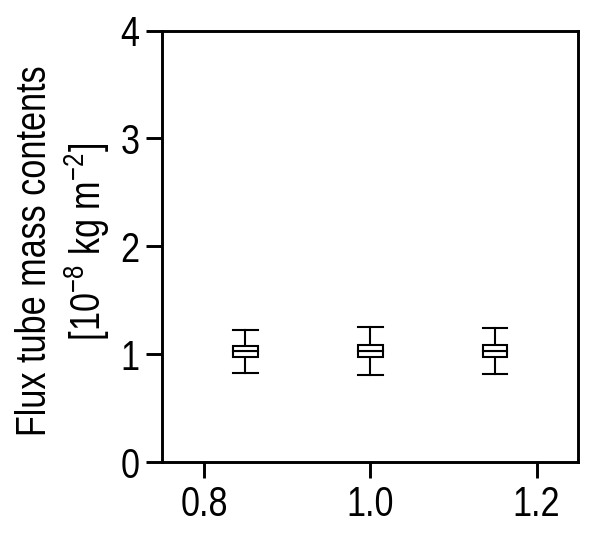

In [448]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(4, 4), dpi='M')
F.initialize()
F.ax.set_xlim(0.75, 1.25)
F.ax.set_ylim(0.0, 4.0)
F.ax.set_ylabel('Flux tube mass contents \n [10$^{-8}$ kg m$^{-2}$]')

x_pos = [0.85, 1.0, 1.15]

for i in range(3):
    column_mass_2d = column_mass_3d_a[:, i, :].T
    chi2_2d = chi2_3d_a[:, i, :].T
    chi2_2d = chi2_2d - np.min(chi2_2d)

    # グリッドの面積比を計算する
    x_grid = ni_3d_a[:, 1, :].T    # shape -> (Ti.size, ni.size)
    y_grid = Ti_3d_a[:, 1, :].T
    dx_arr = x_grid[:-1, 1:]-x_grid[:-1, :-1]
    dy_arr = y_grid[1:, :-1]-y_grid[:-1, :-1]
    area = dx_arr * dy_arr
    weight = area/np.max(area)

    # 面積arrayに形状を揃える
    column_mass_2d = column_mass_2d[:-1, :-1]
    chi2_2d = chi2_2d[:-1, :-1]

    # 3-sigma area
    column_mass_2d = column_mass_2d[np.where(chi2_2d < dchi_3s)]*1E+8
    weight = weight[np.where(chi2_2d < dchi_3s)]
    chi2_2d = chi2_2d[np.where(chi2_2d < dchi_3s)]   # 一番最後に

    quartile1, medians, quartile3 = weighted_percentile(data=column_mass_2d,
                                                        perc=[0.25, 0.5, 0.75],
                                                        weights=weight)

    weighted_boxplot(F.ax, x_pos[i], quartile1, medians, quartile3)

    """F.ax.scatter(x_pos[i], medians, s=30, marker='o',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile1, s=30, marker='^',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)
    F.ax.scatter(x_pos[i], quartile3, s=30, marker='v',
                 edgecolor='k', facecolor='w',
                 zorder=2.0)"""

    print('Median: ', medians)
    print('5 percentile & delta: ', quartile1, medians-quartile1)
    print('95 percentile & delta: ', quartile3, quartile3-medians)

In [449]:
def weighted_boxplot_h(ax, y0, quartile1, medians, quartile3,
                       width=0.03, ec='k', fc='w', lw=1.0):
    # Lower box
    height = medians-quartile1
    patch = patches.Rectangle(xy=(quartile1, y0-width/2),
                              width=height,
                              height=width,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Upper box
    height = quartile3-medians
    patch = patches.Rectangle(xy=(medians, y0-width/2),
                              width=height,
                              height=width,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Vertical line
    ax.plot([quartile1-1.5*(quartile3-quartile1),
             quartile3+1.5*(quartile3-quartile1)],
            [y0, y0],
            color=ec, linewidth=lw,
            zorder=1)

    # Q1-1.5*IQR
    ax.plot([quartile1-1.5*(quartile3-quartile1),
             quartile1-1.5*(quartile3-quartile1)],
            [y0-width/2, y0+width/2],
            color=ec, linewidth=lw,
            zorder=1)

    # Q3+1.5*IQR
    ax.plot([quartile3+1.5*(quartile3-quartile1),
             quartile3+1.5*(quartile3-quartile1)],
            [y0-width/2, y0+width/2],
            color=ec, linewidth=lw,
            zorder=1)

    return None

In [450]:
def weighted_boxplot_h2(ax, y0, quartile1, medians, quartile3,
                        min, max,
                        width=0.03, ec='k', fc='w', lw=1.0):
    # Lower box
    height = medians-quartile1
    patch = patches.Rectangle(xy=(quartile1, y0-width/2),
                              width=height,
                              height=width,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Upper box
    height = quartile3-medians
    patch = patches.Rectangle(xy=(medians, y0-width/2),
                              width=height,
                              height=width,
                              ec=ec,
                              lw=lw,
                              fc=fc)
    patch = ax.add_patch(patch)
    patch.set_zorder(2)

    # Vertical line
    ax.plot([min,
             max],
            [y0, y0],
            color=ec, linewidth=lw,
            zorder=1)

    # Min
    ax.plot([min,
             min],
            [y0-width/2, y0+width/2],
            color=ec, linewidth=lw,
            zorder=1)

    # Max
    ax.plot([max,
             max],
            [y0-width/2, y0+width/2],
            color=ec, linewidth=lw,
            zorder=1)

    return None

Median:  1.0272473233562378
5 percentile & delta:  0.9761436748427258 0.05110364851351201
95 percentile & delta:  1.0741870964066136 0.04693977305037578
Median:  1.0280637887656128
5 percentile & delta:  0.9749220168842343 0.053141771881378475
95 percentile & delta:  1.0844184465841078 0.056354657818495024
Median:  1.0322565342191568
5 percentile & delta:  0.976205316509709 0.056051217709447765
95 percentile & delta:  1.0826180524982059 0.05036151827904911


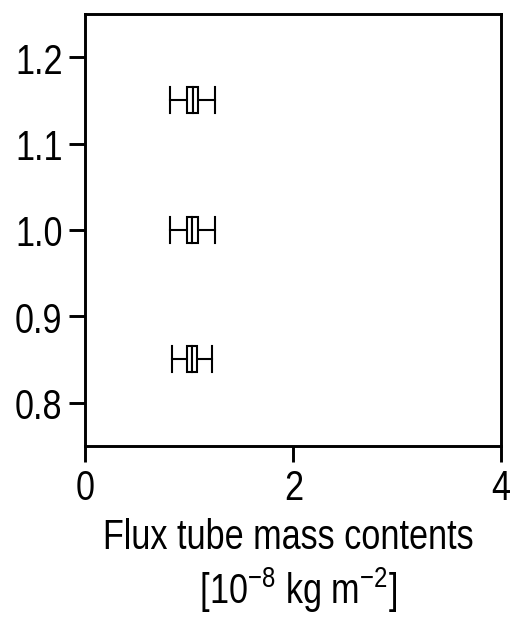

In [451]:
F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(4, 4), dpi='M')
F.initialize()
F.ax.set_xlim(0.0, 4.0)
F.ax.set_ylim(0.75, 1.25)
F.ax.set_xlabel('Flux tube mass contents \n [10$^{-8}$ kg m$^{-2}$]')

y_pos = [0.85, 1.0, 1.15]

for i in range(3):
    column_mass_2d = column_mass_3d_a[:, i, :].T
    chi2_2d = chi2_3d_a[:, i, :].T
    chi2_2d = chi2_2d - np.min(chi2_2d)

    # グリッドの面積比を計算する
    x_grid = ni_3d_a[:, 1, :].T    # shape -> (Ti.size, ni.size)
    y_grid = Ti_3d_a[:, 1, :].T
    dx_arr = x_grid[:-1, 1:]-x_grid[:-1, :-1]
    dy_arr = y_grid[1:, :-1]-y_grid[:-1, :-1]
    area = dx_arr * dy_arr
    weight = area/np.max(area)

    # 面積arrayに形状を揃える
    column_mass_2d = column_mass_2d[:-1, :-1]
    chi2_2d = chi2_2d[:-1, :-1]

    # 3-sigma area
    column_mass_2d = column_mass_2d[np.where(chi2_2d < dchi_3s)]*1E+8
    weight = weight[np.where(chi2_2d < dchi_3s)]
    chi2_2d = chi2_2d[np.where(chi2_2d < dchi_3s)]   # 一番最後に

    quartile1, medians, quartile3 = weighted_percentile(data=column_mass_2d,
                                                        perc=[0.25, 0.5, 0.75],
                                                        weights=weight)

    weighted_boxplot_h(F.ax, y_pos[i], quartile1, medians, quartile3)

    print('Median: ', medians)
    print('5 percentile & delta: ', quartile1, medians-quartile1)
    print('95 percentile & delta: ', quartile3, quartile3-medians)

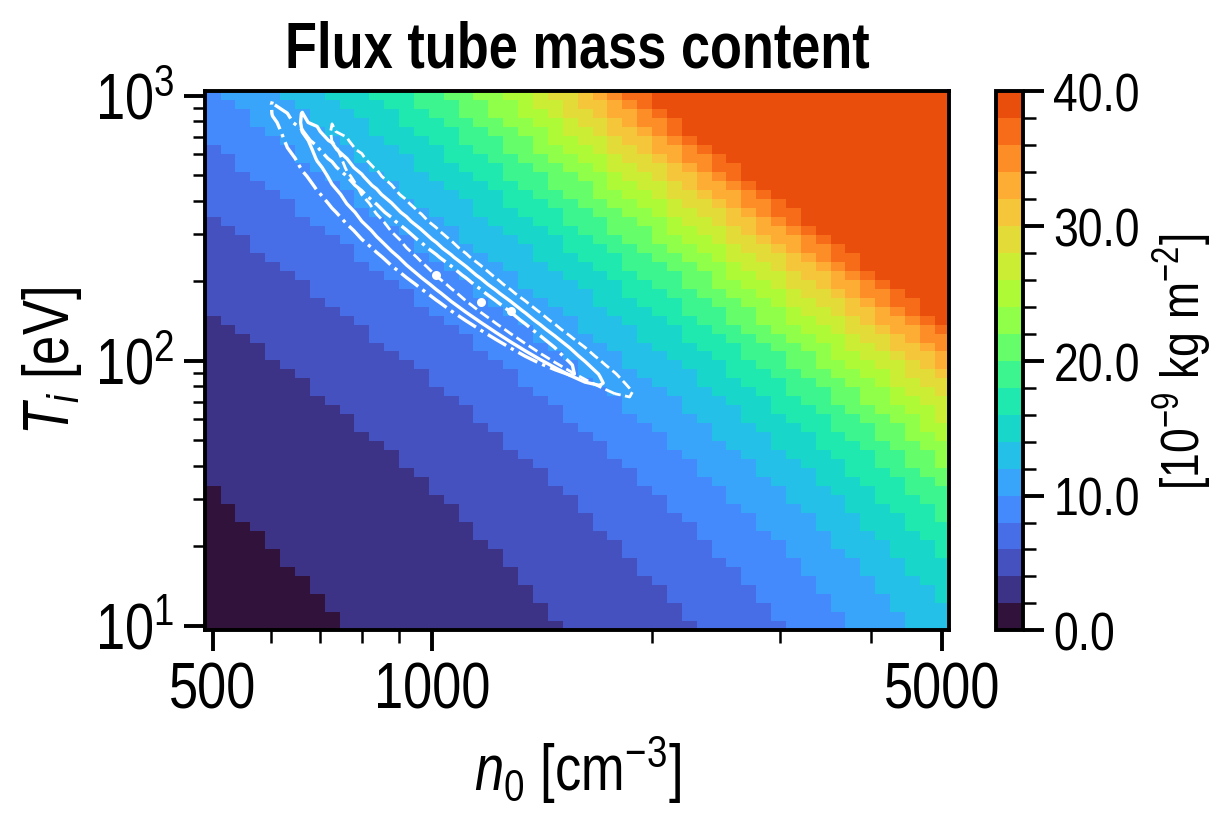

In [452]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'
F.set_default()

fig, ax = plt.subplots(figsize=(6., 3.5),
                       dpi=200)
fig.subplots_adjust(hspace=0.8)

F.fig, F.ax = fig, ax

#
#
# THIRD AXIS
i = 1
z_value_99 = column_mass_3d_a[:, i, :].T
z_value_99 = z_value_99*1E+9
x_value = ni_3d_a[:, i, :].T
y_value = Ti_3d_a[:, i, :].T

ax.set_title('Flux tube mass content', weight='bold')
ax.set_xlabel(r'$n_0$ [cm$^{-3}$]')
ax.set_ylabel(r'$T_i$ [eV]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
linestyles = ['--', '-', '-.']
linewidth = [1.0, 1.2, 1.2]
for i in range(3):
    column_mass_2d = column_mass_3d_a[:, i, :].T
    chi2_2d = chi2_3d_a[:, i, :].T
    chi2_2d = chi2_2d - np.min(chi2_2d)

    z_value = chi2_2d

    cn = ax.contour(x_value, y_value, z_value,
                    levels=[11.8],
                    # levels=[21.36, 30.48, 40.29],
                    colors='w',
                    linewidths=linewidth[i],
                    linestyles=linestyles[i],
                    zorder=2)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value == np.min(z_value))]
    y_best = y_value[np.where(z_value == np.min(z_value))]
    ax.scatter(x_best, y_best,
               s=5, color='w', zorder=2.5)

cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=40)

p = ax.pcolormesh(x_value,
                  y_value,
                  z_value_99,
                  cmap=cmap,
                  norm=norm,
                  zorder=0.5)

# Setting for color bar
cmap_turbo = plt.get_cmap('turbo')
cmap_turbo(0)
color_list = [cmap_turbo(0), cmap_turbo(63), cmap_turbo(127), cmap_turbo(195)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=1)

cax = fig.colorbar(p, ax=ax)
cax.ax.set_yticks(np.linspace(0, 40, 5))
cax.ax.set_yticklabels(np.linspace(0, 40, 5), fontsize=F.fontsize*0.85)
cax.ax.yaxis.set_minor_locator(ptick.AutoMinorLocator(5))
cax.ax.set_ylabel(r'[$10^{-9}$ kg m$^{-2}$]', fontsize=F.fontsize*0.85)

"""F.textbox(ax_idx=0, x=2200, y=200,
          text='PJ3', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')
F.textbox(ax_idx=0, x=2500, y=35,
          text='PJ19', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')
F.textbox(ax_idx=0, x=800, y=200,
          text='PJ28S', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')"""

plt.show()

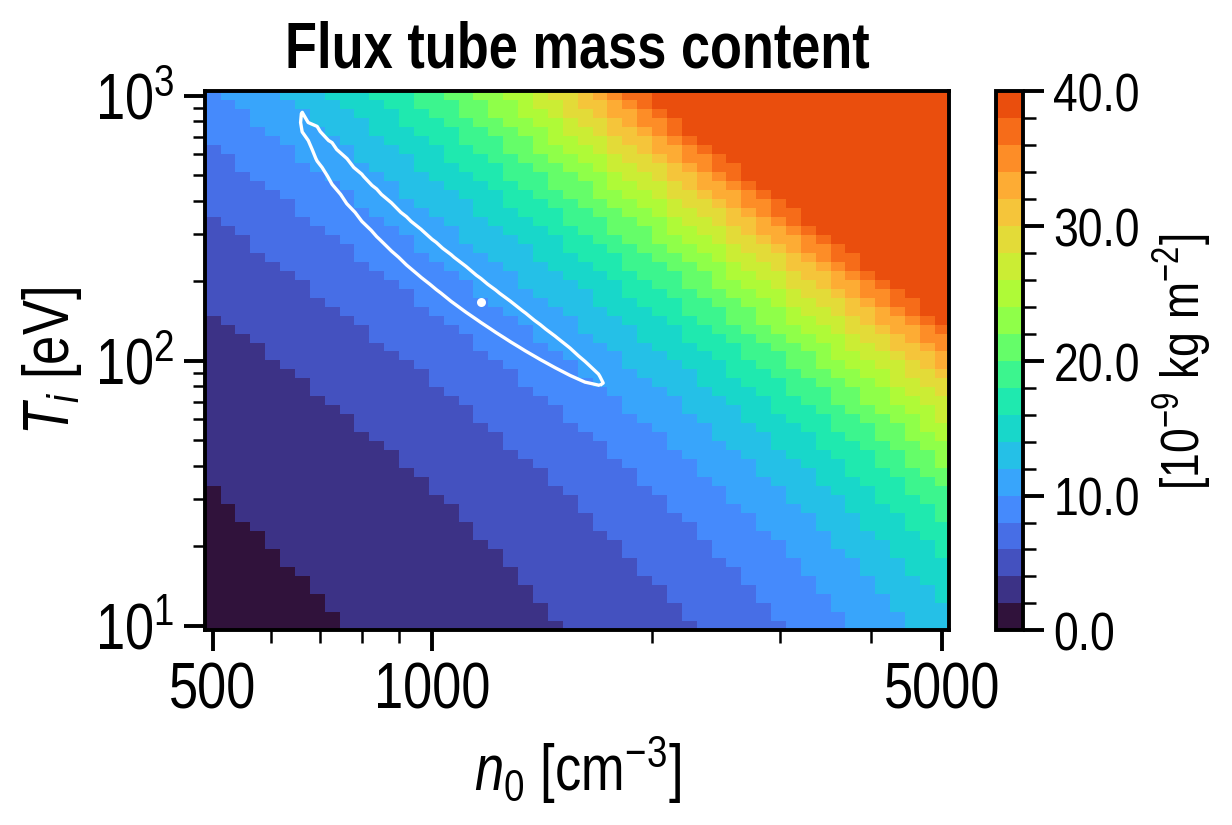

In [453]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'
F.set_default()

fig, ax = plt.subplots(figsize=(6., 3.5),
                       dpi=200)
fig.subplots_adjust(hspace=0.8)

F.fig, F.ax = fig, ax

#
#
# THIRD AXIS
i = 1
z_value_99 = column_mass_3d_a[:, i, :].T
z_value_99 = z_value_99*1E+9
x_value = ni_3d_a[:, i, :].T
y_value = Ti_3d_a[:, i, :].T

ax.set_title('Flux tube mass content', weight='bold')
ax.set_xlabel(r'$n_0$ [cm$^{-3}$]')
ax.set_ylabel(r'$T_i$ [eV]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
linestyles = ['--', '-', '-.']
linewidth = [1.0, 1.2, 1.2]

i = 1
column_mass_2d = column_mass_3d_a[:, i, :].T
chi2_2d = chi2_3d_a[:, i, :].T
chi2_2d = chi2_2d - np.min(chi2_2d)

z_value = chi2_2d

cn = ax.contour(x_value, y_value, z_value,
                levels=[11.8],
                # levels=[21.36, 30.48, 40.29],
                colors='w',
                linewidths=linewidth[i],
                linestyles=linestyles[i],
                zorder=2)

# Location of the chi2 minimum
x_best = x_value[np.where(z_value == np.min(z_value))]
y_best = y_value[np.where(z_value == np.min(z_value))]
ax.scatter(x_best, y_best,
           s=5, color='w', zorder=2.5)

cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=40)

p = ax.pcolormesh(x_value,
                  y_value,
                  z_value_99,
                  cmap=cmap,
                  norm=norm,
                  zorder=0.5)

# Setting for color bar
cmap_turbo = plt.get_cmap('turbo')
cmap_turbo(0)
color_list = [cmap_turbo(0), cmap_turbo(63), cmap_turbo(127), cmap_turbo(195)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=1)

cax = fig.colorbar(p, ax=ax)
cax.ax.set_yticks(np.linspace(0, 40, 5))
cax.ax.set_yticklabels(np.linspace(0, 40, 5), fontsize=F.fontsize*0.85)
cax.ax.yaxis.set_minor_locator(ptick.AutoMinorLocator(5))
cax.ax.set_ylabel(r'[$10^{-9}$ kg m$^{-2}$]', fontsize=F.fontsize*0.85)

plt.show()

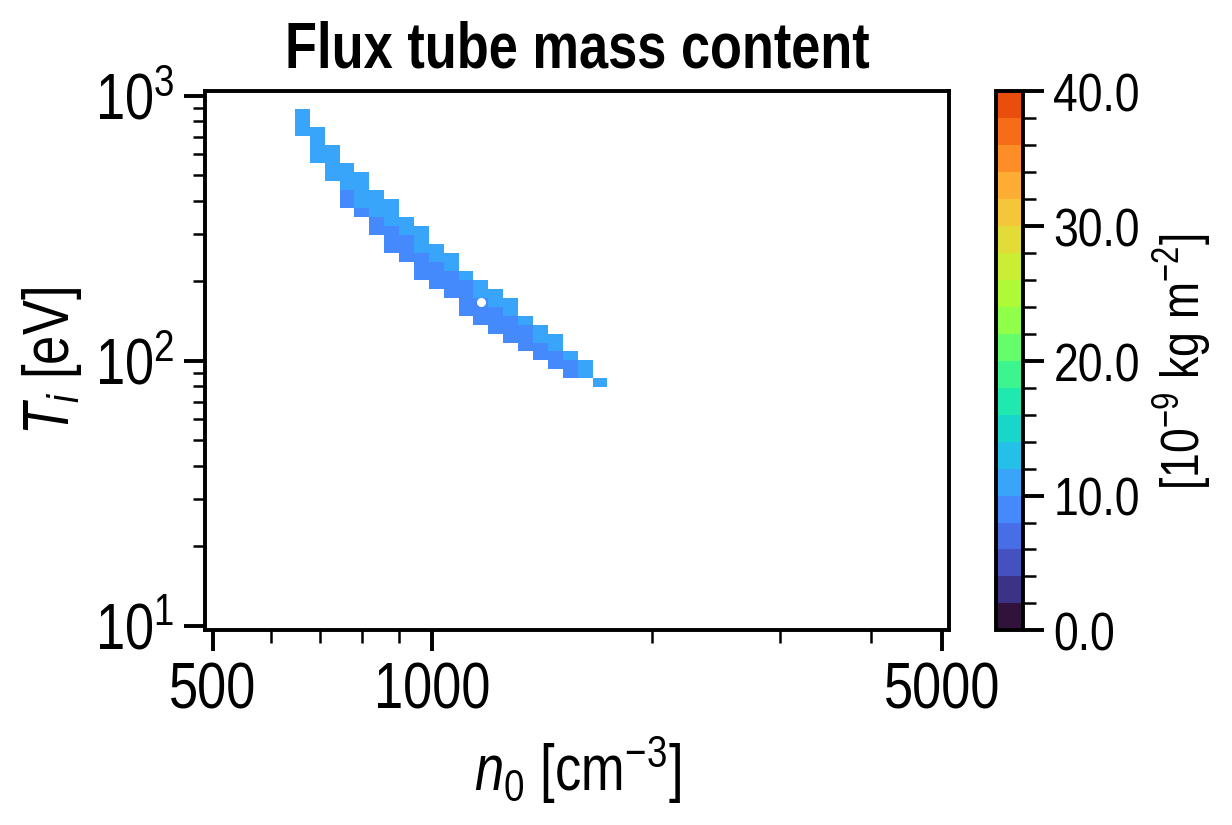

In [454]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'
F.set_default()

fig, ax = plt.subplots(figsize=(6., 3.5),
                       dpi=200)
fig.subplots_adjust(hspace=0.8)

F.fig, F.ax = fig, ax

#
#
# THIRD AXIS
i = 1
z_value_99 = column_mass_3d_a[:, i, :].T
z_value_99 = z_value_99*1E+9
x_value = ni_3d_a[:, i, :].T
y_value = Ti_3d_a[:, i, :].T

ax.set_title('Flux tube mass content', weight='bold')
ax.set_xlabel(r'$n_0$ [cm$^{-3}$]')
ax.set_ylabel(r'$T_i$ [eV]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
linestyles = ['--', '-', '-.']
linewidth = [1.0, 1.2, 1.2]

i = 1
column_mass_2d = column_mass_3d_a[:, i, :].T
chi2_2d = chi2_3d_a[:, i, :].T
chi2_2d = chi2_2d - np.min(chi2_2d)

z_value = chi2_2d
z_value_99 = np.where(z_value < 11.8, z_value_99, np.nan)

"""cn = ax.contour(x_value, y_value, z_value,
                levels=[11.8],
                # levels=[21.36, 30.48, 40.29],
                colors='w',
                linewidths=linewidth[i],
                linestyles=linestyles[i],
                zorder=2)"""

# Location of the chi2 minimum
x_best = x_value[np.where(z_value == np.min(z_value))]
y_best = y_value[np.where(z_value == np.min(z_value))]
ax.scatter(x_best, y_best,
           s=5, color='w', zorder=2.5)

cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=40)

p = ax.pcolormesh(x_value,
                  y_value,
                  z_value_99,
                  cmap=cmap,
                  norm=norm,
                  zorder=0.5)

# Setting for color bar
cmap_turbo = plt.get_cmap('turbo')
cmap_turbo(0)
color_list = [cmap_turbo(0), cmap_turbo(63), cmap_turbo(127), cmap_turbo(195)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=1)

cax = fig.colorbar(p, ax=ax)
cax.ax.set_yticks(np.linspace(0, 40, 5))
cax.ax.set_yticklabels(np.linspace(0, 40, 5), fontsize=F.fontsize*0.85)
cax.ax.yaxis.set_minor_locator(ptick.AutoMinorLocator(5))
cax.ax.set_ylabel(r'[$10^{-9}$ kg m$^{-2}$]', fontsize=F.fontsize*0.85)

plt.show()

まとめたプロット

In [455]:
# グリッドの面積比を計算する
x_grid = ni_3d_a[:, 1, :].T    # shape -> (Ti.size, ni.size)
y_grid = Ti_3d_a[:, 1, :].T
column_mass_2d = column_mass_3d_a[:, 1, :].T
chi2_2d = chi2_3d_a[:, 1, :].T

dx_arr = x_grid[:-1, 1:]-x_grid[:-1, :-1]
dy_arr = y_grid[1:, :-1]-y_grid[:-1, :-1]
print(dx_arr.shape)
print(dy_arr.shape)
print(np.min(dx_arr))
print(np.min(dy_arr))

area = dx_arr * dy_arr
weight = area/np.max(area)

# 面積arrayに形状を揃える
column_mass_2d = column_mass_2d[:-1, :-1]
chi2_2d = chi2_2d[:-1, :-1]

# 5000 /ccで切るかどうか
x_max_idx = np.size(x_grid[0, :])
# x_max_idx = np.argmin(np.abs(x_grid[0, :]-5000.0))
print(x_max_idx)
column_mass_2d = column_mass_2d[:, :x_max_idx-1]
area = area[:, :x_max_idx-1]
weight = weight[:, :x_max_idx-1]
chi2_2d = chi2_2d[:, :x_max_idx-1]

# 3-sigma area
column_mass_2d = column_mass_2d[np.where(chi2_2d-np.min(chi2_2d) < dchi_3s)]
column_mass_2d_h = column_mass_2d.copy()
weight = weight[np.where(chi2_2d-np.min(chi2_2d) < dchi_3s)]
chi2_2d = chi2_2d[np.where(chi2_2d-np.min(chi2_2d) < dchi_3s)]   # 一番最後に

(59, 49)
(59, 49)
24.056567077342834
0.8118075107660818
50


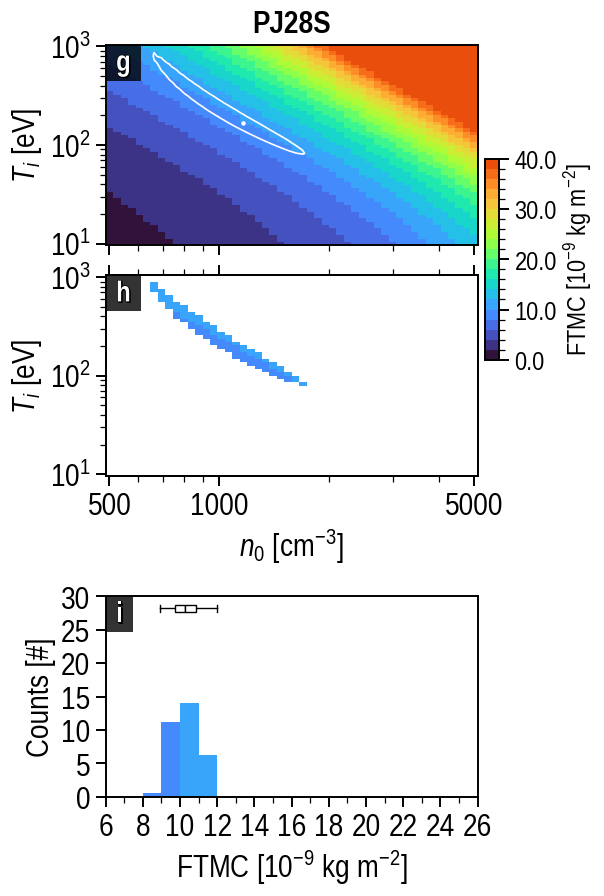

In [457]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'
F.set_default()

fig, ax = plt.subplots(2, 1,
                       figsize=(4.8, 5.6),
                       dpi=100)
fig.subplots_adjust(hspace=0.15)

F.fig, F.ax = fig, ax

i = 1
z_value_99 = column_mass_3d_a[:, i, :].T
z_value_99 = z_value_99*1E+9
x_value = ni_3d_a[:, i, :].T
y_value = Ti_3d_a[:, i, :].T

ax[0].set_title('PJ'+PJ_num[0], weight='bold')
for i in range(2):
    ax[1].set_xlabel(r'$n_0$ [cm$^{-3}$]')
    ax[i].set_ylabel(r'$T_i$ [eV]')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
linestyles = ['--', '-', '-.']
linewidth = [1.0, 1.2, 1.2]
plt.setp(ax[0].get_xticklabels(), visible=False)

# 2枚目の上部にもx軸を描く
ax2 = ax[1].twiny()
ax2.set_xscale('log')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
plt.setp(ax2.get_xticklabels(), visible=False)

i = 1
chi2_2d = chi2_3d_a[:, i, :].T
chi2_2d = chi2_2d - np.min(chi2_2d)

z_value = chi2_2d

cn = ax[0].contour(x_value, y_value, z_value,
                   levels=[11.8],
                   # levels=[21.36, 30.48, 40.29],
                   colors='w',
                   linewidths=linewidth[i],
                   linestyles=linestyles[i],
                   zorder=2)

# Location of the chi2 minimum
x_best = x_value[np.where(z_value == np.min(z_value))]
y_best = y_value[np.where(z_value == np.min(z_value))]
ax[0].scatter(x_best, y_best,
              s=5, color='w', zorder=2.5)

cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=40)

p = ax[0].pcolormesh(x_value,
                     y_value,
                     z_value_99,
                     cmap=cmap,
                     norm=norm,
                     zorder=0.5)

z_value_99 = np.where(z_value < 11.8, z_value_99, np.nan)
p = ax2.pcolormesh(x_value,
                   y_value,
                   z_value_99,
                   cmap=cmap,
                   norm=norm,
                   zorder=0.5)
p = ax[1].pcolormesh(x_value,
                     y_value,
                     z_value_99,
                     cmap=cmap,
                     norm=norm,
                     zorder=0.5)

# Setting for color bar
cmap_turbo = plt.get_cmap('turbo')
cmap_turbo(0)
color_list = [cmap_turbo(0), cmap_turbo(63), cmap_turbo(127), cmap_turbo(195)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=1)

axpos = ax[0].get_position()
ch = 1.0
cspace = 0.015
"""pp_ax = fig.add_axes([axpos.x1+cspace,
                      axpos.y0+axpos.height*(1.0-ch)*0.5,
                      0.03,
                      axpos.height*ch])  # カラーバーのaxesを追加"""
pp_ax = fig.add_axes([axpos.x1+cspace,
                      axpos.y0-axpos.height*0.57,
                      0.03,
                      axpos.height*ch])  # カラーバーのaxesを追加
cax = fig.colorbar(p, cax=pp_ax)
cax.ax.set_yticks(np.linspace(0, 40, 5))
cax.ax.set_yticklabels(np.linspace(0, 40, 5), fontsize=F.fontsize*0.83)
cax.ax.yaxis.set_minor_locator(ptick.AutoMinorLocator(5))
cax.ax.set_ylabel(r'FTMC [$10^{-9}$ kg m$^{-2}$]', fontsize=F.fontsize*0.83)

# 三段目のプロット
axpos = ax[1].get_position()
hax = fig.add_axes(
    [axpos.x0, axpos.y0-axpos.height*1.6, axpos.width, axpos.height*1.0])


# ヒストグラム
hax.set_xlabel(r'FTMC [$10^{-9}$ kg m$^{-2}$]')
hax.set_ylabel(r'Counts [#]')
hax.set_xlim(6, 26)
hax.set_ylim(0, 5)
hax.set_xticks(np.arange(6, 26+1, 2))
hax.set_xticklabels(np.arange(6, 26+1, 2))
hax.set_yticks(np.linspace(0, 5, 7))
hax.set_yticklabels(np.linspace(0, 30, 7, dtype=int))
hax.xaxis.set_minor_locator(AutoMinorLocator(2))  # minor ticks
cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]

_, bins, hpatches = hax.hist(column_mass_2d_h*1E+9,
                             bins=np.arange(6.0, 30.0+1, 1.0),
                             weights=weight)
for i in range(int(len(hpatches)/2)):
    hpatches[2*i].set_facecolor(color_list[i+3])
    hpatches[2*i+1].set_facecolor(color_list[i+3])

# 箱ひげ図
quartile1, medians, quartile3 = weighted_percentile(data=column_mass_2d_h*1E+9,
                                                    perc=[0.25, 0.5, 0.75],
                                                    weights=weight)
weighted_boxplot_h2(hax, 4.7, quartile1, medians, quartile3,
                    np.min(column_mass_2d_h)*1E+9,
                    np.max(column_mass_2d_h)*1E+9, width=0.19)

# Panel names
panel_labels = [' g ', ' h ', ' i ']
path_effects = [pe.PathPatchEffect(offset=(0.75, -0.75), linewidth=0.75, facecolor='k'),
                pe.withStroke(linewidth=1., foreground='k')]
for i in range(2):
    label_box = ax[i].annotate(
        panel_labels[i],
        xy=(0, 1), xycoords='axes fraction',
        xytext=(0.16*20/F.fontsize, -0.16*20/F.fontsize), textcoords='offset fontsize',
        fontweight='bold',
        color='w',
        fontsize=F.fontsize*0.9,
        verticalalignment='top',
        horizontalalignment='left',
        path_effects=path_effects,
        bbox=dict(fc='k', ec='k', alpha=0.8, pad=2.6, lw=0.), zorder=99)
label_box = hax.annotate(
    panel_labels[2],
    xy=(0, 1), xycoords='axes fraction',
    xytext=(0.16*20/F.fontsize, -0.16*20/F.fontsize), textcoords='offset fontsize',
    fontweight='bold',
    color='w',
    fontsize=F.fontsize*0.9,
    verticalalignment='top',
    horizontalalignment='left',
    path_effects=path_effects,
    bbox=dict(fc='k', ec='k', alpha=0.8, pad=2.6, lw=0.), zorder=99)

fig.savefig('img/ftmc_map_PJ'+PJ_num[0]+'_r.pdf', bbox_inches='tight')
plt.show()